# Basic classifiers
* Logistic
* Linear support vector classifier (SVC)
* Naive Bayes (Gaussian)
* Linear/quadratic discriminant analysis
* k>2 class methods

In [2]:
# Load files from introMLNB 
import sys
import os
targetDirectory = os.path.abspath("../../introML/")
sys.path.append(targetDirectory)

%matplotlib inline
# from preamble import *
import mglearn

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

C:\Users\bleba\AppData\Local\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Define some critical functions

In [168]:
# generate points around two different means
# classify these as zero or one
# scramble the data
def make_gclass(n,mu1,mu2):
    x1 = np.random.normal(size=(n,2),loc=mu1,scale=1.)
    x2 = np.random.normal(size=(n,2),loc=mu2,scale=1.)
    y1 = np.zeros(n)
    y2 = np.ones(n)
    Xsource = np.append(x1,x2,axis=0)
    Ysource = np.append(y1,y2)
    # scramble order
    scramIndex = np.random.permutation(2*n)
    X = Xsource[scramIndex]
    Y = Ysource[scramIndex]
    return X,Y

In [169]:
# Simple plotting function
def scatter2Type(X1,X2,y):
    plt.plot(X1[y==0],X2[y==0],'o',label="class 0")
    plt.plot(X1[y==1],X2[y==1],'^',label="class 1")
    plt.legend()
    plt.grid()

In [170]:
# Monte-carlo routine for overfit testing
# Generate new data for each itteration
def MCtraintest(nmc,X,y,modelObj,testFrac):
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return trainScore,testScore

### Simulate some data

Text(0, 0.5, 'Second feature')

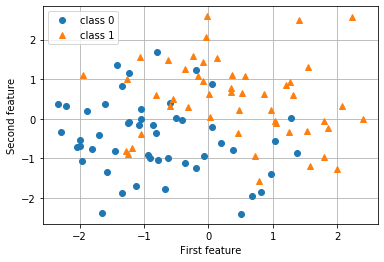

In [179]:
# generate data
X,y = make_gclass(50,-0.5,0.5)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
scatter2Type(X[:,0],X[:,1],y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Logistic regression

0.82
0.82


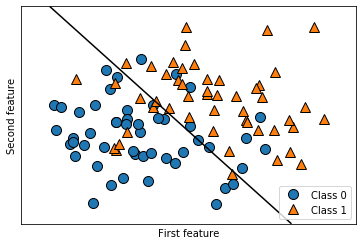

In [180]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0,solver="lbfgs")
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_2d_separator(lr,X[:,0:2], fill=False)

# Linear support vector (Linear SVC)

0.82
0.82


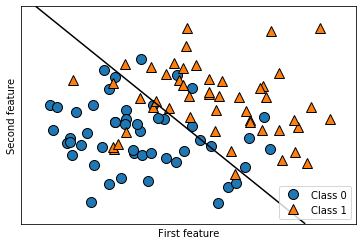

In [181]:
# Linear SVC
# Note that C = 1. is the default
svc = LinearSVC(C=1.)
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_2d_separator(svc,X_train, fill=False)

## Gaussian Naive Bayes
* Naive Bayes with continuous variables as predictors
* Assume these are Gaussian
* Different means for different classes
* Assume independent
* This is also a foundation for other classifiers (discriminant)

### Demo pictures
The next two code plots just are here to generate some nice plots to demonstrate some basic ideas for how Naive Bayes/Discriminant tools work graphically.  

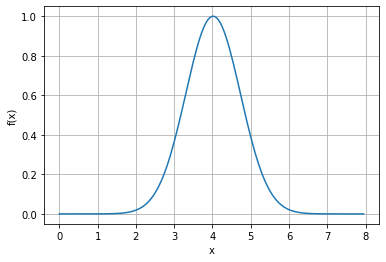

In [174]:
# A quick picture/demo
# Generate fake data
xPred = np.random.normal(loc=4.,scale=1.,size=(500,1))
# Now you would estimate the mean and std
mu = np.mean(xPred)
s  = np.std(xPred)
# Generate a range of test points
xTest = np.arange(start=0.,stop=8.,step=0.05)
# The probability will be proportionate to your statistical distance to the mean
p = np.exp(-(xTest-mu)**2/s**2)
plt.plot(xTest,p)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.grid()
plt.savefig("NBDemo1.png")

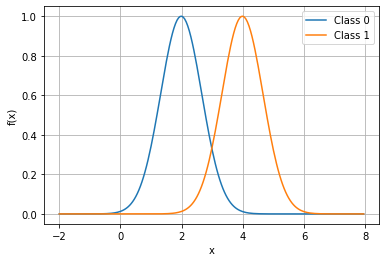

In [175]:
# Now do this with a 0 and 1 class
# Generate fake training data
XPred0 = np.random.normal(loc=2.,scale=1.,size=(500,1))
XPred1 = np.random.normal(loc=4.,scale=1.,size=(500,1))
# Now you would estimate the mean and std
mu0 = np.mean(XPred0)
s0  = np.std(XPred0)
mu1 = np.mean(XPred1)
s1  = np.std(XPred1)
# Generate a range of test points
xTest = np.arange(start=-2.0,stop=8.,step=0.05)
# The probability will be proportionate to your statistical distance to the mean
p0 = np.exp(-(xTest-mu0)**2/s0**2)
p1 = np.exp(-(xTest-mu1)**2/s0**2)
plt.plot(xTest,p0,label="Class 0")
plt.plot(xTest,p1,label="Class 1")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.savefig("NBDemo2.png")

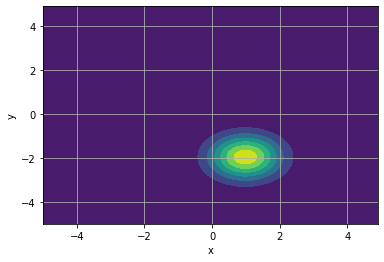

In [3]:
# This is the same idea with two predictors
# Generate fake data
XPred = np.random.normal(loc=(1.0,-2.0),scale=1.0,size=(500,2))

# Estimate the means and std.
mux = np.mean(XPred[:,0])
sx  = np.std(XPred[:,0])
muy = np.mean(XPred[:,1])
sy  = np.std(XPred[:,1])

# Generate range of test variables
xRange = np.arange(-5, 5, 0.1)
yRange = np.arange(-5, 5, 0.1)
# This functions creates a range of values suitable for the contour plot in matplotlib
xx, yy = np.meshgrid(xRange, yRange)
z = np.exp( -((xx-mux)**2/sx**2+(yy-muy)**2/sy**2))
plt.contourf(xRange,yRange,z)
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.savefig("NBdemo3.png")

In [182]:
# fit Gaussian NB classifier
# Note:  No parameters
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print(gnb.score(X_train,y_train))
print(gnb.score(X_test, y_test))

0.82
0.74


In [183]:
# Our standard Monte-carlo experiment
gnb = GaussianNB()
trainS, testS = MCtraintest(500,X,y,gnb,0.5)
print(np.mean(trainS))
print(np.mean(testS))

0.8274400000000001
0.79132


## Linear discriminant
* See notes for comparisons with Naive Bayes
* They are mathematically close

### New assumptions
* Forecast variances can be dependent / multivariate normal
* Variances/convariances are assumed the same in the different classes
* This last assumption yields the linear separation result

In [184]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print(lda.score(X_train,y_train))
print(lda.score(X_test,y_test))

0.82
0.78


X.shape: (100, 2)


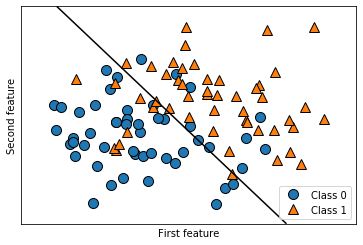

In [185]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
mglearn.plots.plot_2d_separator(lda,X, fill=False)

## Quadratic Discrimant 
* Relax common var/cov matrix across class assumption
* Now boundaries are quadratic
* Closer to original Naive Bayes Gaussian but
* with variance/covariance dependence
* (See notes for more info)

In [186]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
print(qda.score(X_train,y_train))
print(qda.score(X_test,y_test))

0.82
0.8


X.shape: (100, 2)


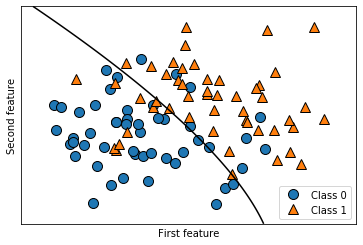

In [187]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
mglearn.plots.plot_2d_separator(qda,X, fill=False)

# Overfitting again

In [188]:
# generate points around two different means
# classify these as zero or one
# NOW:  Add some extra (but useless) information in X3
# scramble the data
def make_gclass2(n,mu1,mu2):
    x1 = np.random.normal(size=(n,2),loc=mu1,scale=1.)
    x2 = np.random.normal(size=(n,2),loc=mu2,scale=1.)
    # Generate complete noise term
    x3 = np.random.normal(size=(2*n,50),loc=0.,scale=1.)
    y1 = np.zeros(n)
    y2 = np.ones(n)
    Xsource = np.append(x1,x2,axis=0)
    Xsource = np.append(Xsource,x3,axis=1)
    Ysource = np.append(y1,y2)
    scramIndex = np.random.permutation(2*n)
    X = Xsource[scramIndex]
    Y = Ysource[scramIndex]
    return X,Y

### Logistic

In [189]:
X,y = make_gclass2(100,-0.5,0.5)
X = (X-X.mean())/X.std()
tmodel = LogisticRegression(C=10000000.,max_iter=5000,solver="lbfgs")
trainS, testS = MCtraintest(500,X,y,tmodel,0.5)
print(np.mean(trainS))
print(np.mean(testS))
tmodel = LogisticRegression(C=0.1,max_iter=5000,solver="lbfgs")
trainS, testS = MCtraintest(500,X,y,tmodel,0.5)
print(np.mean(trainS))
print(np.mean(testS))

1.0
0.6550799999999999
0.93102
0.6731800000000001


### Support vector

In [190]:
X,y = make_gclass2(100,-0.5,0.5)
X = (X-X.mean())/X.std()
tmodel = LinearSVC(C=1000000.,max_iter=100000,tol=1e-2)
trainS, testS = MCtraintest(500,X,y,tmodel,0.5)
print(np.mean(trainS))
print(np.mean(testS))

tmodel = LinearSVC(C=0.05,max_iter=100000,tol=1e-2)
trainS, testS = MCtraintest(500,X,y,tmodel,0.5)
print(np.mean(trainS))
print(np.mean(testS))

1.0
0.635
0.9520799999999999
0.66584


# Quick summary

### Logistic and Linear support vectors

* Very different models
* Often similar in their outcomes
* Nonlinear support vectors (coming soon) are very different

### Types of Naive Bayes type classifiers
* Assume Var/Cov is identity (independent forecasts) and same for all classes
    * Gassian Naive Bayes / linear boundaries (not in Scikit Learn)
* Assume Var/Cov is identity but different over classes
    * Gaussian Naive Bayes (as in scikit learn)
* Assume Var/Cov is regular matrix (dependence) but same over classes
    * Linear discriminant
* Assume Var/Cov is different over classes
    * Quadratic discriminant

# Multiple (K>2) classes
* What do you do when more than two classes?
* This can be tricky
* Many methods

In [191]:
# Simulate three classes/Gaussian forecasts
def make_gclass3(n,mu1,mu2):
    # note:  this puts the mean at (mu1,mu1) in (x,y) space
    x1 = np.random.normal(size=(n,2),loc=mu1,scale=1.)
    # This will be (mu2,mu2)
    x2 = np.random.normal(size=(n,2),loc=mu2,scale=1.)
    # this is (mu1,mu2)
    x3 = np.random.normal(size=(n,2),loc=(mu1,mu2),scale=1.)
    # n of each class (0,1,2)
    y1 = np.zeros(n)
    y2 = np.ones(n)
    y3 = 2*np.ones(n)
    # stack the data up
    Xsource = np.append(x1,x2,axis=0)
    Xsource = np.append(Xsource,x3,axis=0)
    Ysource = np.append(y1,y2)
    Ysource = np.append(Ysource,y3)
    scramIndex = np.random.permutation(3*n)
    X = Xsource[scramIndex]
    Y = Ysource[scramIndex]
    return X,Y

In [192]:
X,y = make_gclass3(50,-1.25,1.25)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

[2. 0. 2. 1. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 2. 1. 2. 0. 2. 0. 2. 1.
 2. 0. 1. 0. 0. 2. 0. 1. 1. 1. 2. 0. 0. 0. 1. 2. 2. 2. 2. 1. 2. 2. 1. 0.
 1. 1. 2. 1. 0. 1. 1. 2. 2. 0. 2. 2. 0. 0. 2. 1. 1. 1. 2. 1. 1. 2. 2. 0.
 0. 1. 1. 0. 0. 2. 0. 0. 0. 1. 1. 0. 1. 1. 2. 2. 2. 0. 1. 2. 0. 0. 2. 1.
 2. 0. 2. 1. 0. 0. 1. 1. 2. 0. 1. 2. 2. 0. 2. 0. 1. 2. 0. 0. 1. 2. 0. 2.
 2. 1. 1. 2. 1. 1. 1. 0. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 0. 2.
 1. 0. 0. 0. 2. 2.]


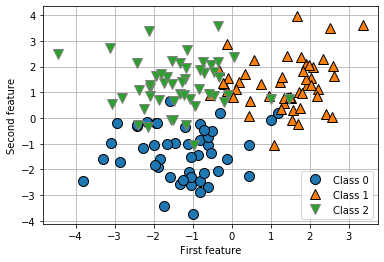

In [194]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.grid()
print(y)

In [195]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print(gnb.score(X_train,y_train))
print(gnb.score(X_test, y_test))
print(gnb.predict(X_test))

0.84
0.8666666666666667
[0. 1. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 1. 1. 1. 1. 2. 1. 2. 1. 2. 0. 2. 2.
 0. 1. 1. 2. 0. 2. 1. 0. 2. 1. 0. 2. 0. 0. 2. 1. 2. 0. 2. 0. 0. 1. 1. 1.
 2. 1. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 1. 2. 1. 2. 1. 0. 2. 0. 1. 2. 0. 1.
 1. 2. 2.]


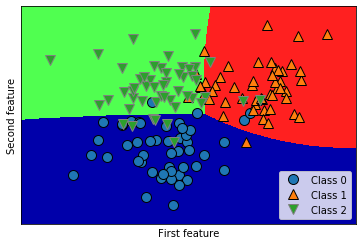

In [196]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_2d_classification(gnb,X, fill=True)

In [197]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print(lda.score(X_train,y_train))
print(lda.score(X_test, y_test))

0.84
0.88


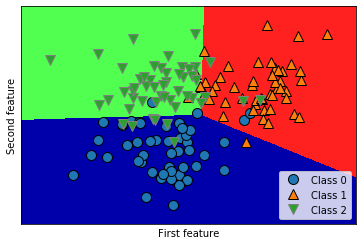

In [198]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_2d_classification(lda,X, fill=True)

In [199]:
svc = LinearSVC(C=1.)
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_test, y_test))

0.8533333333333334
0.8666666666666667


## Separation with support vectors
* Support vectors use one-versus-others as default
* When in doubt use distance to other regions

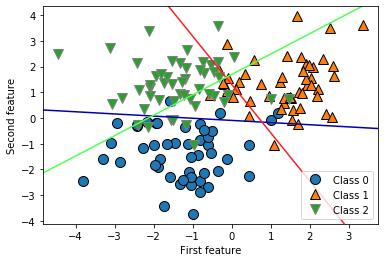

In [200]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
line = np.linspace(-15, 15)
for coef, intercept, color in zip(svc.coef_, svc.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

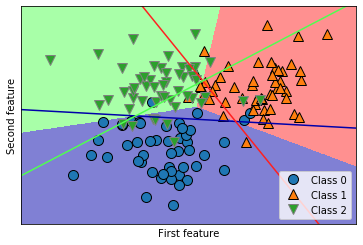

In [201]:
# Fill in classification regions
mglearn.plots.plot_2d_classification(svc,X, fill=True, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
line = np.linspace(-15, 15)
for coef, intercept, color in zip(svc.coef_, svc.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

# Summary
* Core basic classification systems
* Naive Bayes/discriminant analysis
* Logistic regression
* Support vectors
* Multi-class methods

    * Be careful (automation in Scikit-learn)
    * Sometimes regression might be the way to go (ordered)
    

# A quick Python note:  Method Chaining
* How to string methods together in python
* General methods:  fit(), predict()
* They are applied to the object to the left of them
* This is a coveniet part of Python syntax and SciKit Learn

In [202]:
# instantiate model and fit with many lines
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_test,y_test)
y_pred = logreg.predict(X_test)

In [203]:
# put a couple together
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [204]:
# put all together
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
print(y_pred)

[0. 1. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 1. 1. 1. 1. 2. 1. 2. 1. 2. 0. 2. 2.
 0. 1. 1. 2. 0. 2. 1. 0. 2. 1. 0. 2. 0. 0. 2. 1. 2. 0. 2. 0. 0. 1. 1. 1.
 2. 1. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 1. 1. 1. 2. 1. 0. 2. 0. 1. 2. 0. 1.
 1. 2. 2.]
